# Stochastic Gradient Boosting - nutcracker
Conny Lin | June 17, 2020

## run on google colab

In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
file_dir = '/content/gdrive/My Drive/ED Brain Station/data'
import pandas as pd
import numpy as np
import os

# load array
X = np.loadtxt(os.path.join(file_dir, 'nutcracker_X_train.csv'), delimiter=',')
y = np.loadtxt(os.path.join(file_dir, 'nutcracker_y_train.csv'), delimiter=',')
X_test = np.loadtxt(os.path.join(file_dir, 'nutcracker_X_test.csv'), delimiter=',')
y_test = np.loadtxt(os.path.join(file_dir, 'nutcracker_y_test.csv'), delimiter=',')

# print the array
print(X.shape)

(1600000, 21)



run one untune model

In [ ]:
# untune model
from sklearn.ensemble import GradientBoostingClassifier
import time
start_time = time.time()
model = GradientBoostingClassifier(random_state=318, verbose=3)
model.fit(X,y)
train_score = model.score(X, y)
print(f'train score: {train_score}')
test_score = model.score(X_test, y_test)
print(f'test score: {test_score}')
print(f'took {(time.time()-start_time)/60:.2f}min')

      Iter       Train Loss   Remaining Time 
         1           1.2935           19.02m
         2           1.2176           18.67m
         3           1.1545           18.33m
         4           1.1012           18.07m
         5           1.0563           17.80m
         6           1.0179           17.54m
         7           0.9854           17.32m
         8           0.9566           17.10m
         9           0.9310           16.82m
        10           0.9090           16.53m
        11           0.8897           16.25m
        12           0.8719           15.98m
        13           0.8577           15.73m
        14           0.8435           15.50m
        15           0.8306           15.27m
        16           0.8201           15.06m
        17           0.8095           14.84m
        18           0.8005           14.62m
        19           0.7915           14.42m
        20           0.7837           14.21m
        21           0.7762           14.01m
        2

Tune:
n_estimators = [5, 10, 20, 50, 100]

learning_rate = [0.001, 0.01, 0.1]

subsample = [0.5, 0.7, 1.0]

max_depth = [3, 7, 9]



fitting 4 estimators
      Iter       Train Loss   Remaining Time 
         1           1.2935           35.55s
         2           1.2176           23.70s
         3           1.1545           11.84s
         4           1.1012            0.00s
train score: 0.833270625
test score: 0.8328575
took 0.81min
fitting 10 estimators
      Iter       Train Loss   Remaining Time 
         1           1.2935            1.78m
         2           1.2176            1.58m
         3           1.1545            1.40m
         4           1.1012            1.20m
         5           1.0563           59.63s
         6           1.0179           47.67s
         7           0.9854           35.74s
         8           0.9566           23.83s
         9           0.9310           11.87s
        10           0.9090            0.00s
train score: 0.834148125
test score: 0.833515
took 1.99min
fitting 20 estimators
      Iter       Train Loss   Remaining Time 
         1           1.2935            3.60m
   

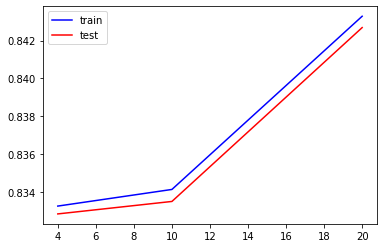

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import matplotlib.pyplot as plt

n_estimators = [4, 10, 20]
train_score_list = []
test_score_list = []
for n in n_estimators:
  start_time = time.time()
  model = GradientBoostingClassifier(random_state=318, n_estimators=n, verbose=3)
  print(f'fitting {n} estimators')
  model.fit(X,y)
  train_score = model.score(X, y)
  train_score_list.append(train_score)
  print(f'train score: {train_score}')
  test_score = model.score(X_test, y_test)
  test_score_list.append(test_score)
  print(f'test score: {test_score}')
  print(f'took {(time.time()-start_time)/60:.2f}min')

plt.figure()
plt.plot(n_estimators, train_score_list, color='blue', label='train')
plt.plot(n_estimators, test_score_list, color='red', label='test')
plt.legend()
plt.show()

In [ ]:
# example of grid searching key hyperparameters for GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# load data
X = np.loadtxt(os.path.join(file_dir, 'nutcracker_X_train.csv'), delimiter=',')
y = np.loadtxt(os.path.join(file_dir, 'nutcracker_y_train.csv'), delimiter=',')

# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [5, 10, 20, 50, 100]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]

# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv=5 #cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0, verbose=5)
grid_result = grid_search.fit(X, y)

# summarize results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 157.3min


In [ ]:
grid search did not finish

## run smaller batches to tune



### max_depth on google colab

In [ ]:
import timeit, os
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import numpy as np

# import data
# connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')
file_dir = '/content/gdrive/My Drive/ED Brain Station/data'

# load array
X = np.loadtxt(os.path.join(file_dir, 'nutcracker_X_train.csv'), delimiter=',')
y = np.loadtxt(os.path.join(file_dir, 'nutcracker_y_train.csv'), delimiter=',')
X_test = np.loadtxt(os.path.join(file_dir, 'nutcracker_X_test.csv'), delimiter=',')
y_test = np.loadtxt(os.path.join(file_dir, 'nutcracker_y_test.csv'), delimiter=',')
# print the array
print(X.shape)

# set up time
start_time_all = timeit.timeit()
print('timer start')
print(f'test timer {(timeit.timeit() - start_time_all)/60:.2f} min')
# hyperparameters
n_estimators = 20
max_depth_list = [3, 7, 9]
# declare output var
test_scores = []
train_scores = []
# test hyperparameter
for max_depth in max_depth_list:
    print(f'running {max_depth}')
    # set up time
    start_time = timeit.timeit()
    # start model
    NN_model = GradientBoostingClassifier(max_depth=max_depth)
    NN_model.fit(X, y)
    # get scores
    train_score = NN_model.score(X, y)
    test_score = NN_model.score(X_test, y_test)
    # print results
    print(f"\tTrain Score: {train_score}")
    print(f"\tTest Score: {test_score}")
    # print time elapsed
    print(f'\ttook {(timeit.timeit() - start_time)/60:.2f} min')

# set up time
start_time_all = timeit.timeit()
print(f'total time: {(timeit.timeit() - start_time_all)/60:.2f} min')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(1600000, 21)
timer start
test timer -0.00 min
running 3
	Train Score: 0.87604375
	Test Score: 0.875275
	took 0.00 min
running 7
	Train Score: 0.89990375
	Test Score: 0.896415
	took 0.00 min
running 9
	Train Score: 0.913314375
	Test Score: 0.90374
	took 0.00 min
total time: -0.00 min


seems max_depth=9 is the best. See if higher can be better.


## max_depth 9 and more

In [ ]:
import time, os
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set up time
session_start = time.time()
print('timer start')
print(f'test timer {(time.time() - session_start)/60:.2f} min')
# hyperparameters - testing
max_depth_list = np.arange(9,20,dtype=int)
hyperparameter_list = max_depth_list
hyperparameter_name = 'max_depth_list'
# hyperparameters - determined
n_estimators = 20
# declare output var
train_score_list = []
test_score_list = []
# test hyperparameter
for max_depth in max_depth_list:
    print(f'running {max_depth}')
    # set up time
    start_time = time.time()
    # start model
    NN_model = GradientBoostingClassifier(max_depth=max_depth)
    NN_model.fit(X, y)
    # get scores
    train_score = NN_model.score(X, y)
    print(f"\tTrain Score: {train_score}")
    train_score_list.append(train_score)
    test_score = NN_model.score(X_test, y_test)
    print(f"\tTest Score: {test_score}")
    test_score_list.append(test_score)
    # print time elapsed
    print(f'\ttook {(time.time() - start_time)/60:.2f} min')

# report total time
print(f'total time: {(time.time() - session_start)/60:.2f} min')

# plot 
plt.figure()
plt.plot(hyperparameter_list, train_score_list, color='blue', label='train')
plt.plot(hyperparameter_list, test_score_list, color='red', label='test')
plt.xlabel(hyperparameter_name)
plt.ylabel('accuracy score')
plt.legend()
plt.show()

timer start
test timer 26543516.13 min
running 9
	Train Score: 0.913315
	Test Score: 0.9037325
	took 51.91 min
running 10
	Train Score: 0.923209375
	Test Score: 0.907465
	took 59.90 min
running 11
	Train Score: 0.9347825
	Test Score: 0.9103975
	took 69.34 min
running 12
	Train Score: 0.949330625
	Test Score: 0.911925
	took 73.38 min
running 13
